- 파이썬 머신러닝 완벽가이드 그리고 고려대학교 강필성 교수님 강의를 기반으로 만든 스터디 자료입니다.

### 7.5.2 그래디언트 부스팅

이번에는 부스팅의 또 다른 인기 알고리즘인 **그래디언트 부스팅**(Gradient Boosting)에 대해 알아보도록 하자. 그래디언트 부스팅은 '7.5.1 - 아다부스트'에서 살펴본 것 처럼 전의 학습된 모델의 오차를 보완하는 방향으로 모델(분류기, 학습기)을 추가해주는 방법은 동일하다. 하지만, **그래디언트 부스팅**은 아다부스트 처럼 학습단계 마다 데이터 샘플의 가중치를 업데이트 해주는 것이 아니라 학습 전단계 모델에서의 **잔여 오차(residual error)**에 대해 새로운 모델을 학습시키는 방법이다. 

![](./images/gbt.png)

#### 예제 데이터에 그래디언트 부스팅 적용하기

아래의 예제는 그래디언트 부스팅을 회귀문제에 적용해 본 예제이다. 예제 데이터의 모양은 아래의 식과 같다.

$$
y = 3X^{2} + 0.05 + \text{noise}
$$

그래디언트 부스팅은 의사결정나무(decision tree) 알고리즘을 이용해 그래디언트 부스팅을 사용하며, 이를 **그래디언트 트리 부스팅** 또는 **그래디언트 트리 부스팅** 또는 **그래디언트 부스티드 회귀 트리(GRBT)**라고 한다. 

먼저 `DecisionTreeRegressor` 그래디언트 부스팅을 단계별로 살펴보자.

In [31]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [32]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

처음 학습시킨 모델 `tree_reg1`에 대한 잔여 오차(residual error)를 구한 뒤 이것을 가지고 두번째 `DecisionTreeRegressor`모델을 학습시킨다.

In [33]:
y2 = y - tree_reg1.predict(X)  # residual errors

tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

위와 같은 방법으로 두번째 모델에 대한 잔여 오차를 구해 세번째 모델을 학습시킨다.

In [34]:
y3 = y2 - tree_reg2.predict(X)  # residual error

tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

이렇게 학습 시킨 그래디언트 부스팅 모델에 새로운 데이터 `X_new = 0.8`에 대해 예측값을 구해보자.

In [35]:
X_new = np.array([[0.8]])  # new data

y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
print('y_pred :', y_pred)

y_pred : [0.75026781]


위의 과정을 그림으로 나타내면 아래와 같다.

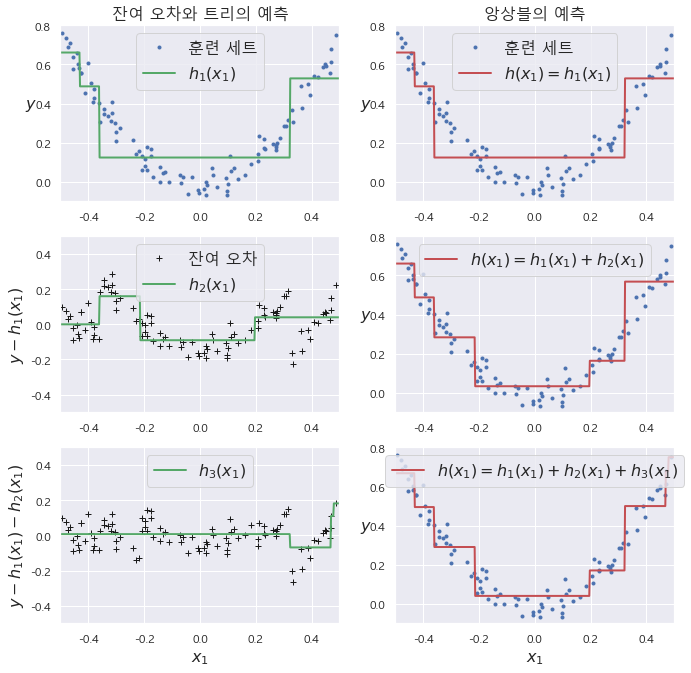

In [37]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="훈련 세트")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("잔여 오차와 트리의 예측", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="훈련 세트")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("앙상블의 예측", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="잔여 오차")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

이번에는 Scikit-Learn의 [`GradientBoostingRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)를 이용해 위의 과정과 동일하게 모델링 해보자. 아래의 결과에서 볼 수 있듯이, `DecisionTreeRegressor`를 이용해 그래디언트 부스팅을 단계별로 수행한 것과 동일한것을 알 수 있다.

`GradientBoostingRegressor`에서 `learning_rate`($\eta$) 인자는 학습 단계에서 각 모델(트리)의 반영 비율을 의미한다. 

$$
H_t(\mathbf{x}) = H_{t-1}(\mathbf{x}) + \eta h_t(\mathbf{x})
$$

- $\eta$의 값은 $0 < \eta \le 1$이며, 값이 작을 수록 학습을 위해 더 많은 모델(트리)가 필요하지만, 성능은 좋아진다.

이렇게 `learning_rate`($\eta$)를 이용하는 방법을 **축소**(shrinkage)라고 하는 규제(regularization) 방법이다.

## Shrinkage방법

![](./img/GBM_shrinkage.png)

GradientBoostingRegressor 파라미터
- loss: 경사 하강법에서 사용할 비용 함수 지정(default: 'deviance')
- learning_rate: GBM이 학습을 진행할 때마다 적용하는 학습률(default: 1)
    위에서 람다 값
    높게 설정: 최소 오류 값을 찾지 못하고 그냥 지나쳐 버려 예측 성능이 떨어질 가능성이 높으나 빠름
    낮게 설정: 반복이 완료돼도 최소 오류 값을 찾지 못함
    n_estimator와 상호 보완적 조합 가능
- n_estimators: weak learner의 개수. 순차적으로 오류 보정(default: 100)
    개수가 많을수록 어느 정도 성능이 좋아지나 느림
- subsample: weak learner가 학습에 사용하는 데이터 샘플링 비율(default: 1)
    과적합이 걱정될 경우 1보다 낮은 값으로 사용

![](./img/GBM_subsampling.png)

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [44]:
print('y_pred :', gbrt.predict(X_new))

y_pred : [0.75026781]


아래의 예제는 학습시킬 모델의 개수(`n_estimator`)를 3개와 200개로 했을 때의 차이를 나타낸 것이다.

In [45]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=1, random_state=42)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

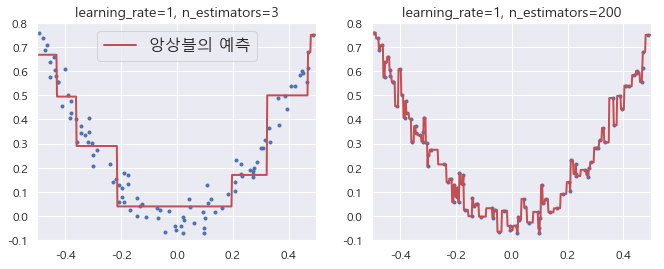

In [46]:
plt.figure(figsize=(11,4))

plt.subplot(121)
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="앙상블의 예측")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)

plt.show()

#### 조기종료(early stopping)을 이용한 그래디언트 부스팅

그래디언트 부스팅의 학습 단계에서 학습 시킬 최적의 트리(모델)의 개수를 찾기 위해 [조기 종료(early stopping)](https://github.com/ExcelsiorCJH/Hands-On-ML/blob/master/Chap04-Training_Models/Chap04-Training_Models.ipynb)을 사용할 수 있다. 

아래의 예제는 GBRT를 학습시킨 후 `staged_predict()` 메소드를 이용해 각 모델의 예측값(`y_pred`)과 실제값(`y_val`)의 MSE를 구한 뒤 MSE가장 낮은 최적의 트리의 개수를 찾아 다시 최적의 트리 개수(`best_n_estimator`)로 그래디언트 부스팅을 학습시키는 예제이다.

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

# 최적의 트리 개수 찾기
errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors)

# 최적의 트리개수로 그래디언트 부스팅 학습
gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=55, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

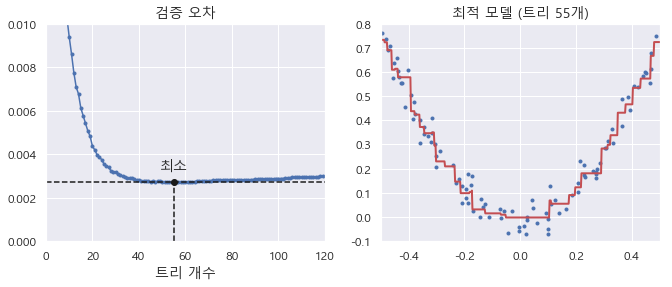

In [51]:
min_error = np.min(errors)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "최소", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("트리 개수")
plt.title("검증 오차", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("최적 모델 (트리 %d개)" % bst_n_estimators, fontsize=14)

plt.show()

다음 예제는 학습 과정에서 최적의 트리 개수를 찾았을 때, 학습을 조기종료 하는 예제이다.

In [52]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # 조기 종료

In [54]:
print('최적의 트리 개수 :', gbrt.n_estimators)
print("최소 검증 MSE:", min_val_error)

최적의 트리 개수 : 61
최소 검증 MSE: 0.002712853325235463


## 7.6 스태킹 (Stacking)

**스태킹**(stacking, stacked generalization의 줄임)은 '7.1 - 투표 기반 분류기'에서 처럼 'hard voting', 'soft voting' 방법이 아니라 앙상블 학습에서 각 모델의 예측값을 가지고 새로운 **메타 모델(meta learner)**을 학습시켜 최종 예측 모델을 만드는 방법을 말한다.

![](./images/stacking.png)

스태킹(stacking)의 과정은 다음과 같다.

1. 학습 데이터셋에서 샘플링을 통해 서브셋1(subset-1)을 만들고, 이 서브셋을 이용해 각 모델을 학습시킨다. 
2. 서브셋2(subset-2) 학습 시킨 모델을 이용해 각 모델의 예측값을 출력하고 예측값들을 합친다.
3. 합쳐진 예측값들을 입력 특성(input feature)로 사용하는 새로운 모델(meta learner, blender)을 학습시킨다.